<div style="background-color:#DBEDF3; padding:20px; font-size:15px">

**🗺️Objective:**
    
The objective of this project is to perform market segmentation analysis for McDonald's customers based on their perceptions and preferences. Using a dataset containing responses from McDonald's customers, we aim to identify distinct segments within the customer base and understand the characteristics and preferences of each segment. Specifically, we will analyze the following aspects:

**1. Perceptions and Preferences:** Investigate how customers perceive various aspects of McDonald's products and services, including factors such as taste, convenience, healthiness, pricing, and overall satisfaction.

**2. Demographic Analysis:** Explore the demographic characteristics of McDonald's customers, including age, gender, and visit frequency. Determine if there are any demographic patterns or trends within different segments.

**3. Market Segmentation:** Utilize advanced clustering techniques to segment McDonald's customers based on their responses and characteristics. Identify homogeneous groups of customers with similar preferences and behaviors.

**4. Segment Profiling:** Profile each segment to understand their unique preferences, attitudes, and behaviors towards McDonald's. Determine key drivers of satisfaction and loyalty within each segment.

**5. Strategic Insights:** Provide actionable insights and recommendations to McDonald's management based on the segmentation analysis. Suggest targeted marketing strategies, product offerings, and service improvements to better cater to the needs of each segment and enhance overall customer satisfaction and loyalty.

By achieving these objectives, we aim to provide McDonald's with valuable insights into their customer base, enabling them to tailor their marketing efforts and operational strategies to meet the diverse needs and preferences of different customer segments effectively. Ultimately, this analysis will contribute to improving customer satisfaction, driving repeat business, and maximizing long-term profitability for McDonald's.

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
    
|       | **Attribute** | **Information** |
| :---  |     :---      |       :---      |      
| **1** | **yummy** | Indicates whether the respondent finds McDonald's food tasty. Possible values: 'No', 'Yes' |                
| **2** | **convenient** | Indicates whether the respondent finds McDonald's convenient. Possible values: 'Yes', 'No' |                        
| **3** | **spicy** | Indicates whether the respondent likes spicy food at McDonald's. Possible values: 'No', 'Yes' |
| **4** | **fattening** | Indicates whether the respondent thinks McDonald's food is fattening. Possible values: 'Yes', 'No' |
| **5** | **greasy** | Indicates whether the respondent finds McDonald's food greasy. Possible values: 'No', 'Yes' |
| **6** | **fast** | Indicates whether the respondent thinks McDonald's service is fast. Possible values: 'Yes', 'No' |  
| **7** | **cheap** | Indicates whether the respondent thinks McDonald's food is cheap. Possible values: 'Yes', 'No' |
| **8** | **tasty** | Indicates whether the respondent finds McDonald's food tasty. Possible values: 'No', 'Yes' |                      
| **9** | **expensive** | Indicates whether the respondent thinks McDonald's food is expensive. Possible values: 'Yes', 'No' |
| **10** | **healthy** | Indicates whether the respondent thinks McDonald's food is healthy. Possible values: 'No', 'Yes' |
| **11** | **disgusting** | Indicates whether the respondent finds McDonald's food disgusting. Possible values: 'No', 'Yes' |                     
| **12** | **Like** | Respondent's overall sentiment towards McDonald's. Possible values: '-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3', '0', '-4', '-1' |
| **13** | **VisitFrequency** | Frequency of visits to McDonald's. Possible values: 'Every three months', 'Once a week', 'Once a month', 'Once a year', 'More than once a week', 'Never' |
| **14** | **Gender** | Gender of the respondent. Possible values: 'Female', 'Male' |


## **Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

print("Libraries imported successfully.")

Libraries imported successfully.


This code imports the following libraries:

pandas: For data manipulation and analysis.

numpy: For numerical computing.

matplotlib.pyplot and seaborn: For data visualization.

LabelEncoder: For encoding categorical variables.

KMeans: For performing k-means clustering.

StandardScaler: For standardizing the data.

silhouette_score: For evaluating the clustering performance using silhouette score

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mcdonalds.csv")

### **Understand Data:**

In [ ]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
data.shape

(1453, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
data.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1453.0,44.604955,14.221178,18.0,33.0,45.0,57.0,71.0


In [ ]:
data.describe(include="object")

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,439,788


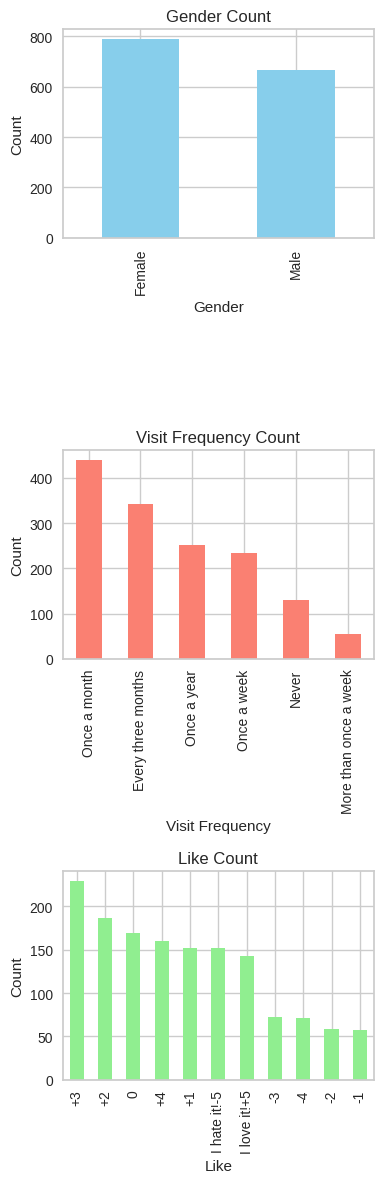

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(4, 12))

# Plot Gender count
data['Gender'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Gender Count')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot VisitFrequency count
data['VisitFrequency'].value_counts().plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Visit Frequency Count')
axes[1].set_xlabel('Visit Frequency')
axes[1].set_ylabel('Count')

# Plot Like count
data['Like'].value_counts().plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Like Count')
axes[2].set_xlabel('Like')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [ ]:
first_11 = data.columns[:11]  # Assuming the first 11 columns are categorical attributes
x = data.loc[:, first_11]
x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


### **2. Explore and Preprocess Data:**

**2.1 Determine the types of values present in categorical columns**

In [ ]:
# list of categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

print("List of categorical columns:")
print(categorical_columns)


List of categorical columns:
['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'VisitFrequency', 'Gender']


In [ ]:
# Iterate over each categorical column
for column in categorical_columns:
    unique_values = data[column].unique()
    print(f" '{column}': {unique_values}")


 'yummy': ['No' 'Yes']
 'convenient': ['Yes' 'No']
 'spicy': ['No' 'Yes']
 'fattening': ['Yes' 'No']
 'greasy': ['No' 'Yes']
 'fast': ['Yes' 'No']
 'cheap': ['Yes' 'No']
 'tasty': ['No' 'Yes']
 'expensive': ['Yes' 'No']
 'healthy': ['No' 'Yes']
 'disgusting': ['No' 'Yes']
 'Like': ['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
 'VisitFrequency': ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
 'Gender': ['Female' 'Male']


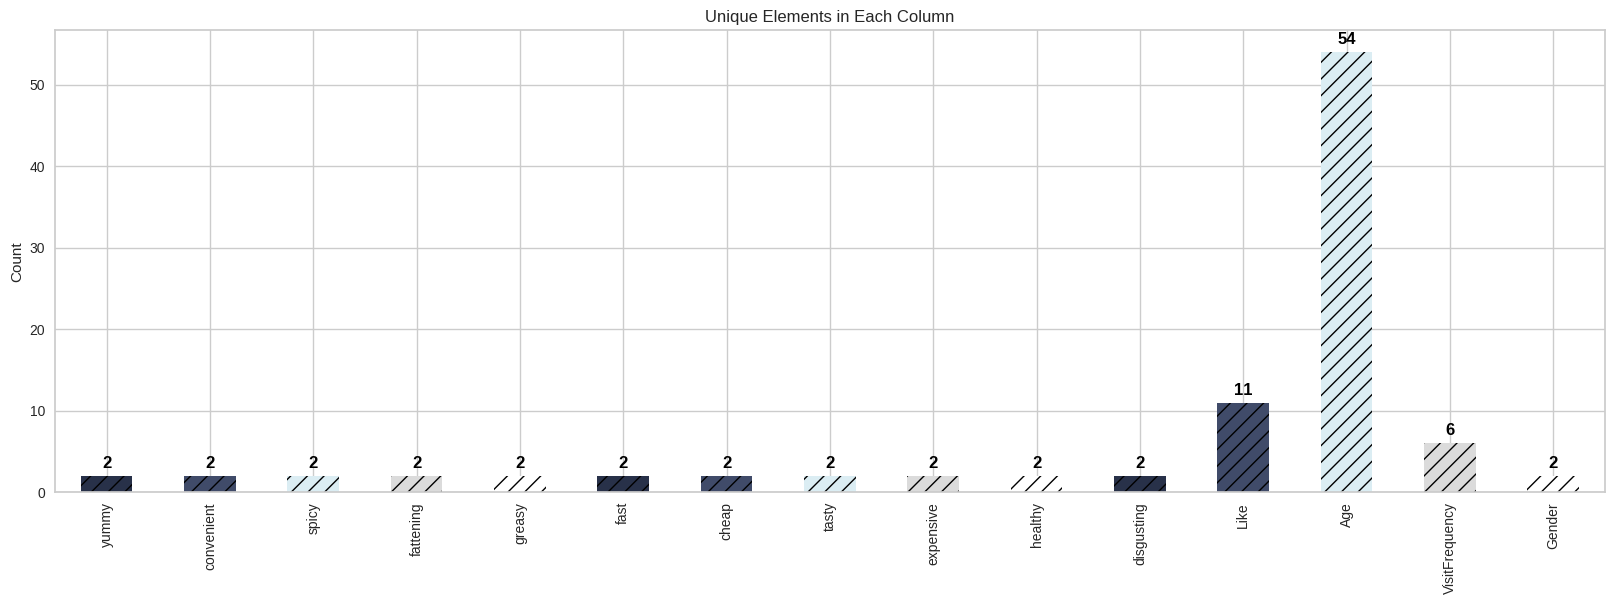

In [ ]:
colors = ["#283149", "#404B69", "#DBEDF3", "#DBDBDB", "#FFFFFF"]
# Plot the unique values
unique = data.nunique()
plt.figure(figsize=(20, 6))
unique.plot(kind='bar', color=colors, hatch='//')
plt.title('Unique Elements in Each Column')
plt.ylabel('Count')
for i, v in enumerate(unique.values):
    plt.text(i, v+1, str(v), color='black', fontweight='bold', ha='center')
plt.show()

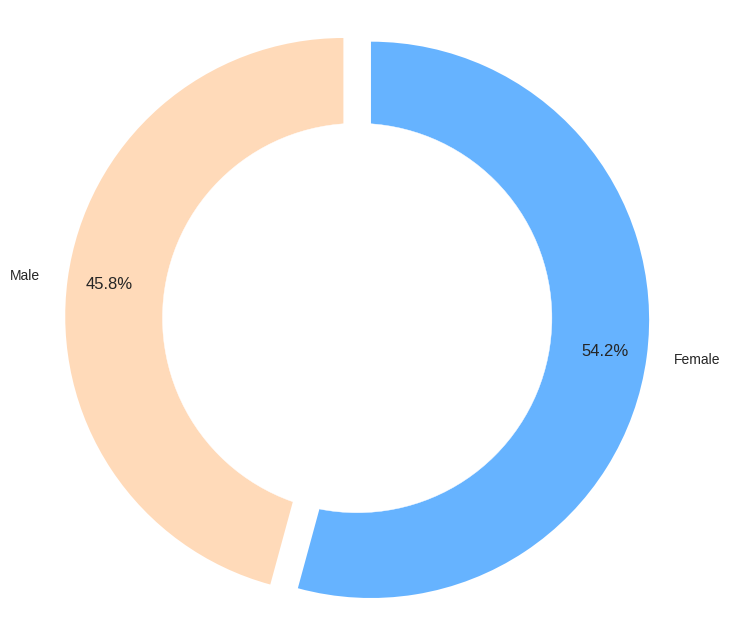

In [ ]:
# Define labels and sizes based on the DataFrame
labels = ['Male', 'Female']
sizes = [data[data['Gender'] == 'Male']['Gender'].count(), data[data['Gender'] == 'Female']['Gender'].count()]

# Define colors and explode
colors = ['#ffdaB9', '#66b3ff']
explode = (0.05, 0.05)

# Create the pie chart
plt.figure(figsize=(8, 8))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
plt.axis('equal')
plt.gca().add_artist(my_circle)

# Show the plot
plt.show()


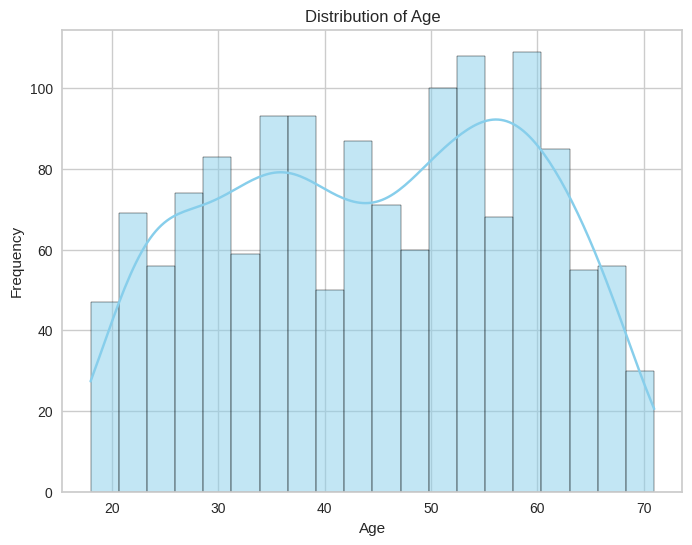

In [ ]:
# Plot histogram for the 'Age' column
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


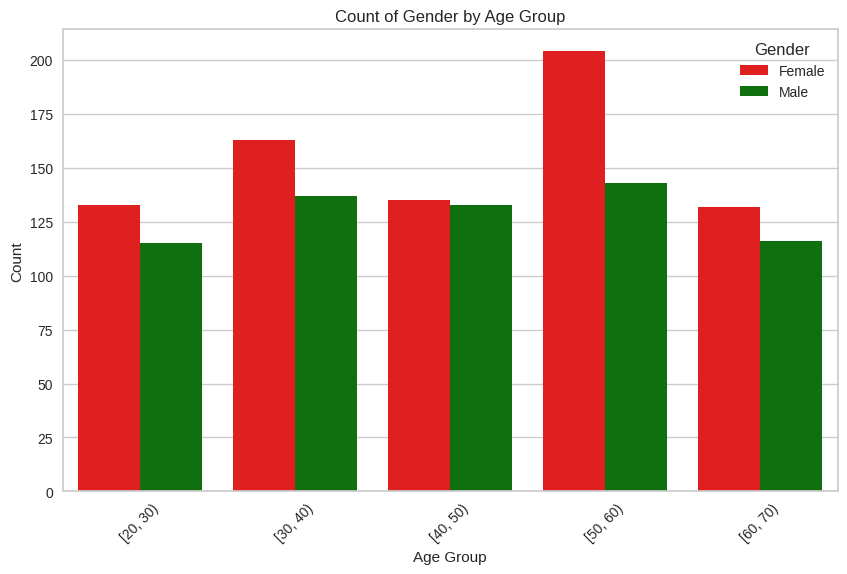

In [ ]:
# Create age groups
data['Age_Group'] = pd.cut(data['Age'], bins=range(20, 71, 10), right=False)

# Plot count of gender by age groups
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age_Group', hue='Gender', palette={'Male': 'green', 'Female': 'red'})
plt.title('Count of Gender by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


In [ ]:
data.shape # Age group columnadded

(1453, 16)

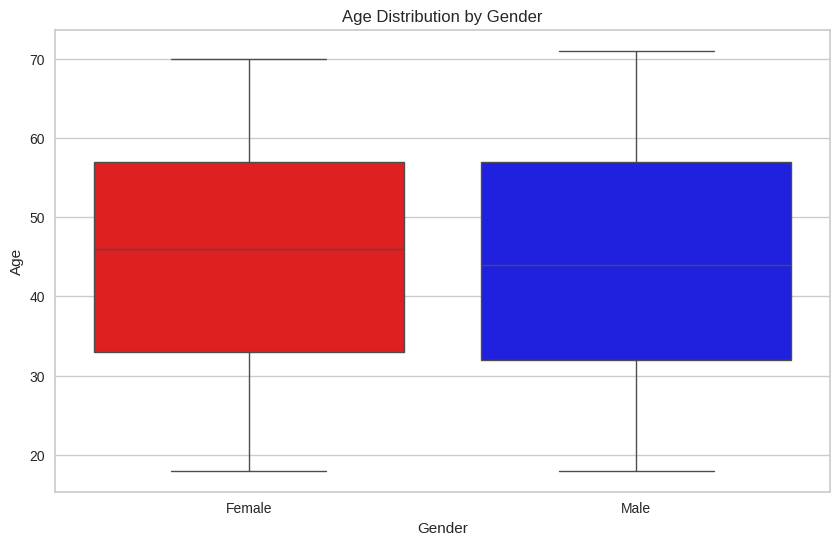

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Gender', y='Age',hue='Gender', palette={'Male': 'blue', 'Female': 'red'})
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


**2.1 Convert Perception Terms:**

In [ ]:
first_11 = data.columns[:11]  # Assuming the first 11 columns are categorical attributes
x = data.loc[:, first_11]
x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [ ]:
def perception_to_numeric(value):
    if value.lower() == 'yes':
        return 1
    elif value.lower() == 'no':
        return 0
    else:
        return None  # Handling unknown values

perception_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                      'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for column in perception_columns:
    x[column] = x[column].apply(perception_to_numeric)

In [ ]:
x.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


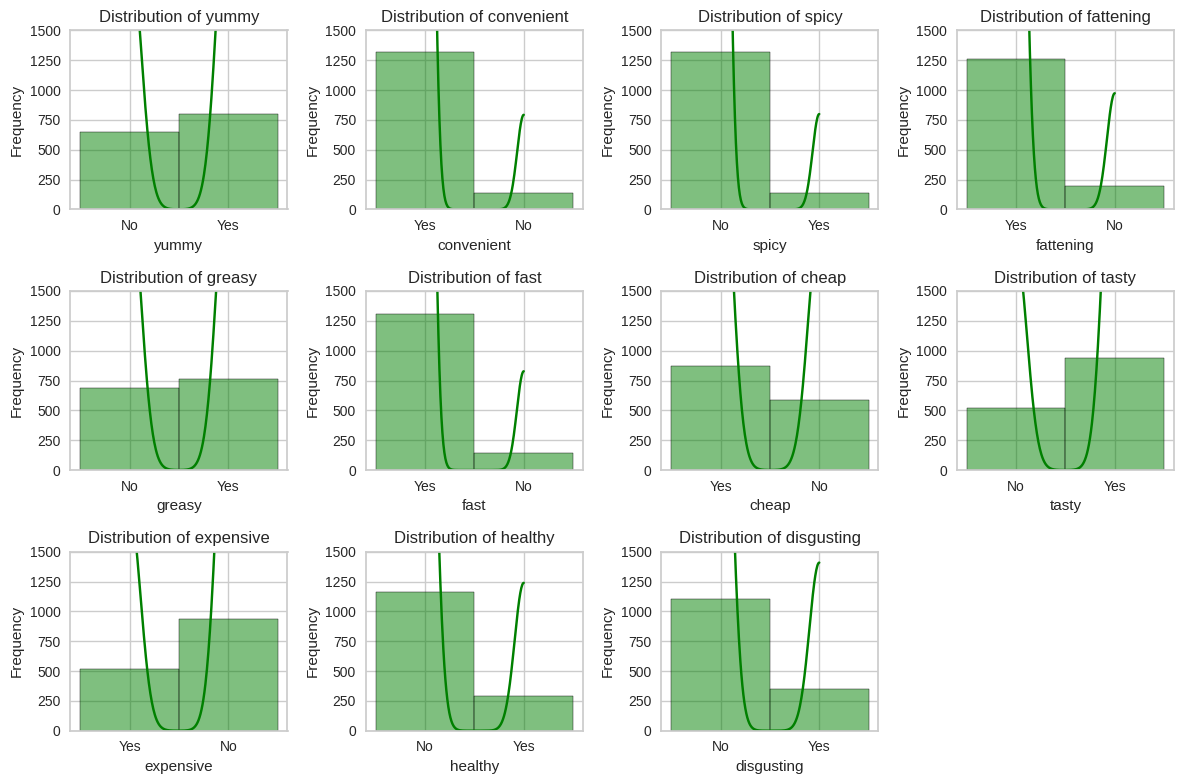

In [ ]:
# Select numerical columns
numerical_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast',
                     'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Plot histograms for numerical variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=20, kde=True, color='green')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.ylim(0,1500)
    plt.xticks([0, 1])  # 0 -no, 1- yes

plt.tight_layout()
plt.show()


In [ ]:
columns=['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']
for column in columns:
  print(x[column].value_counts())
  print("-"*30)


yummy
1    803
0    650
Name: count, dtype: int64
------------------------------
convenient
1    1319
0     134
Name: count, dtype: int64
------------------------------
spicy
0    1317
1     136
Name: count, dtype: int64
------------------------------
fattening
1    1260
0     193
Name: count, dtype: int64
------------------------------
greasy
1    765
0    688
Name: count, dtype: int64
------------------------------
fast
1    1308
0     145
Name: count, dtype: int64
------------------------------
cheap
1    870
0    583
Name: count, dtype: int64
------------------------------
tasty
1    936
0    517
Name: count, dtype: int64
------------------------------
expensive
0    933
1    520
Name: count, dtype: int64
------------------------------
healthy
0    1164
1     289
Name: count, dtype: int64
------------------------------
disgusting
0    1100
1     353
Name: count, dtype: int64
------------------------------


In [ ]:
data.describe(include="object")

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,VisitFrequency,Gender
count,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453,1453
unique,2,2,2,2,2,2,2,2,2,2,2,11,6,2
top,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,No,+3,Once a month,Female
freq,803,1319,1317,1260,765,1308,870,936,933,1164,1100,229,439,788


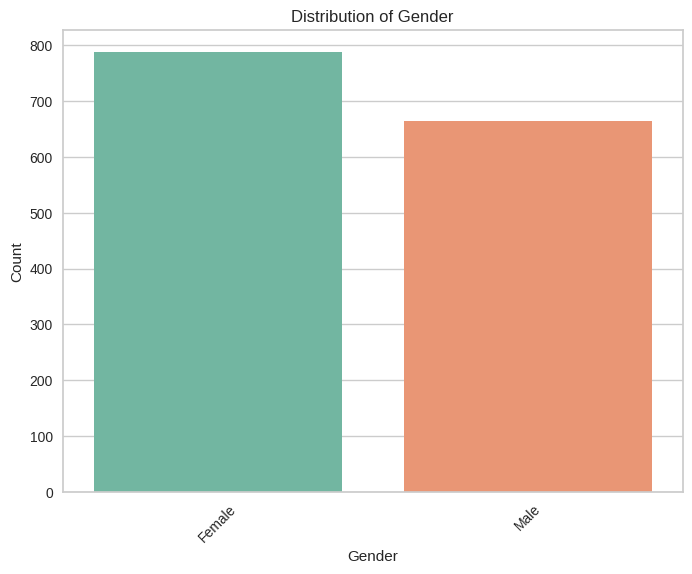

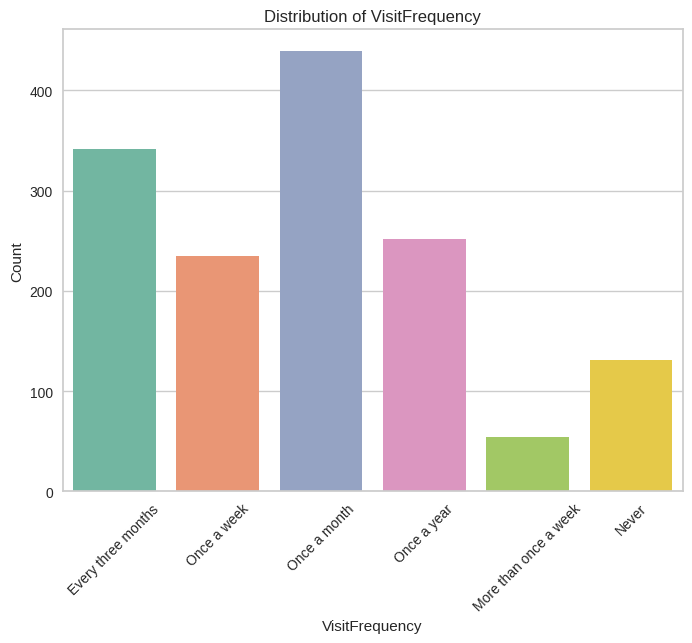

In [ ]:
# Plot value counts or bar plots for categorical variables
categorical_columns = ['Gender', 'VisitFrequency']  # Add other categorical columns if needed
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=column, hue=column, palette='Set2', legend=False)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


**2.2 Encode Categorical Variables:**

In [ ]:
encoder = LabelEncoder()
#x['Gender'] = encoder.fit_transform(data['Gender'])
#x['VisitFrequency'] = encoder.fit_transform(data['VisitFrequency'])
#x['Like'] = encoder.fit_transform(data['Like'])

In [ ]:
data['Like'].value_counts().sum()

1453

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   yummy       1453 non-null   int64
 1   convenient  1453 non-null   int64
 2   spicy       1453 non-null   int64
 3   fattening   1453 non-null   int64
 4   greasy      1453 non-null   int64
 5   fast        1453 non-null   int64
 6   cheap       1453 non-null   int64
 7   tasty       1453 non-null   int64
 8   expensive   1453 non-null   int64
 9   healthy     1453 non-null   int64
 10  disgusting  1453 non-null   int64
dtypes: int64(11)
memory usage: 125.0 KB


In [ ]:
data['Like']= data['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
unique_like_values = data['Like'].unique()
print("Unique values in the 'Like' column after processing:")
print(unique_like_values)

Unique values in the 'Like' column after processing:
['-3' '+2' '+1' '+4' '+5' '-5' '-2' '+3' '0' '-4' '-1']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   yummy           1453 non-null   object  
 1   convenient      1453 non-null   object  
 2   spicy           1453 non-null   object  
 3   fattening       1453 non-null   object  
 4   greasy          1453 non-null   object  
 5   fast            1453 non-null   object  
 6   cheap           1453 non-null   object  
 7   tasty           1453 non-null   object  
 8   expensive       1453 non-null   object  
 9   healthy         1453 non-null   object  
 10  disgusting      1453 non-null   object  
 11  Like            1453 non-null   object  
 12  Age             1453 non-null   int64   
 13  VisitFrequency  1453 non-null   object  
 14  Gender          1453 non-null   object  
 15  Age_Group       1411 non-null   category
dtypes: category(1), int64(1), object(14)
memory usage: 172.1+ KB

In [ ]:
data.isna().sum()

yummy              0
convenient         0
spicy              0
fattening          0
greasy             0
fast               0
cheap              0
tasty              0
expensive          0
healthy            0
disgusting         0
Like               0
Age                0
VisitFrequency     0
Gender             0
Age_Group         42
dtype: int64

In [ ]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'Age_Group'],
      dtype='object')

### **3. Dimensionality Reduction :**

In [ ]:
x.shape[1]

11

In [ ]:
x.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722


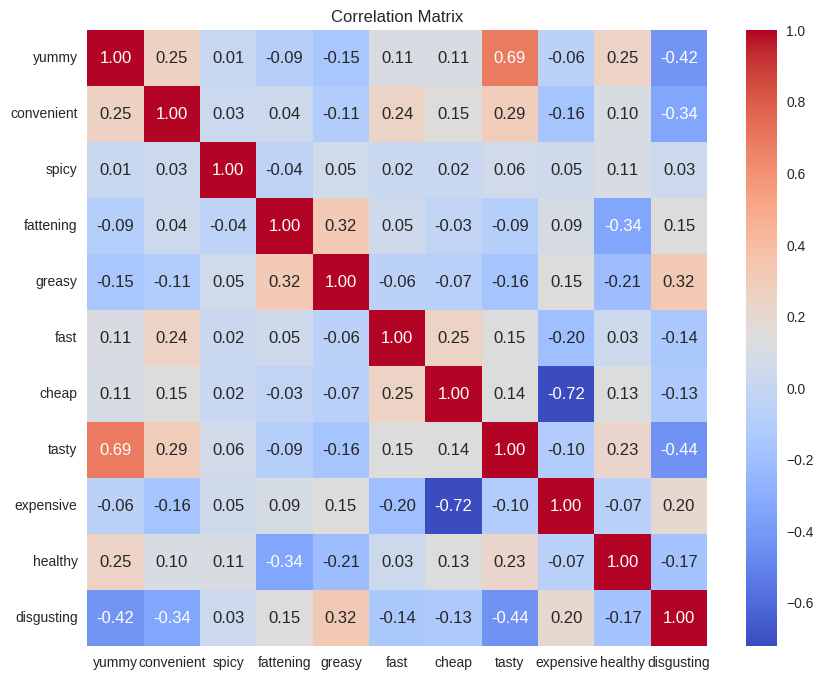

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(x.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Fit PCA and compute explained variance ratio
pca = PCA()
pca.fit(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance_ratio = explained_variance_ratio.cumsum()

print("Standard deviation of each principal component:")
print(pca.explained_variance_)
print("="*60)
# Print explained variance ratio for each component
print("Explained Variance Ratio for each component:")
print(explained_variance_ratio)
print("="*60)
# Print cumulative explained variance
print("Cumulative Explained Variance:")
print(cumulative_variance_ratio)

Standard deviation of each principal component:
[2.81316617 1.6329477  1.38111047 1.08171127 0.91895162 0.78253978
 0.71533376 0.59270042 0.52426978 0.3078135  0.25703129]
Explained Variance Ratio for each component:
[0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]
Cumulative Explained Variance:
[0.25556637 0.40391399 0.52938308 0.62765279 0.71113635 0.78222737
 0.84721295 0.90105773 0.94868581 0.9766496  1.        ]


In [ ]:
num_components = np.argmax(cumulative_variance_ratio >= 0.90) + 1
print("Number of components needed to explain at least 90% of the variance:", num_components)

Number of components needed to explain at least 90% of the variance: 8


In [ ]:
# Initialize PCA with 10 components
pca = PCA(n_components=8)

# Fit PCA to your data
pca.fit(x)

# Transform the data onto the new reduced dimension space
X_pca = pca.transform(x)

names = ['Pc1', 'Pc2', 'Pc3', 'Pc4', 'Pc5', 'Pc6', 'Pc7', 'Pc8']
pf = pd.DataFrame(data = X_pca, columns = names)
pf

,Pc1,Pc2,Pc3,Pc4,Pc5,Pc6,Pc7,Pc8
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758
...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374


In [ ]:
# correlation coefficient between original variables and the component
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
variable,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539


Loadings are the coefficients of the linear combinations that define each principal component. For each original variable, there is a corresponding loading for each PC. The loadings indicate the direction and strength of the relationship between the original variables and the PCs. Higher absolute values of loadings indicate a stronger relationship between the variable and the PC.

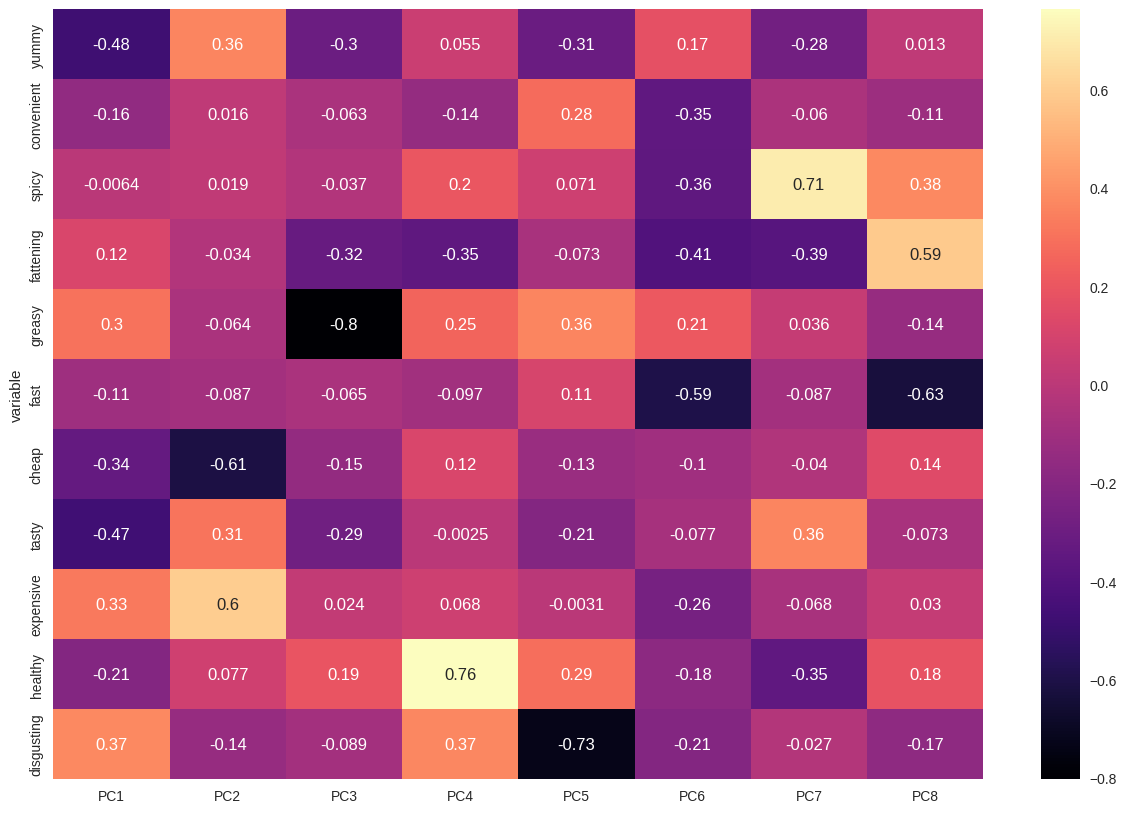

In [ ]:
#Correlation matrix plot for loadings
plt.rcParams['figure.figsize'] = (15,10)
ax = sns.heatmap(loadings_df, annot=True, cmap='magma')
plt.show()

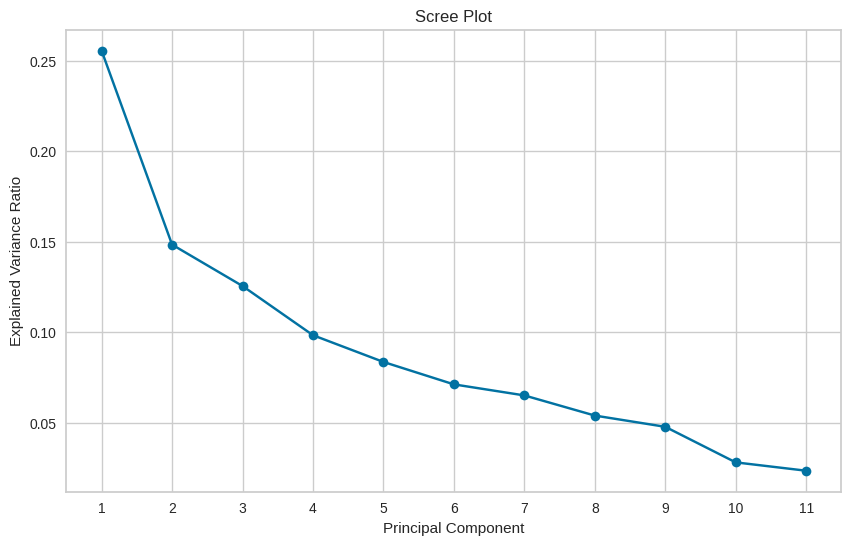

In [ ]:
# Plot the scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

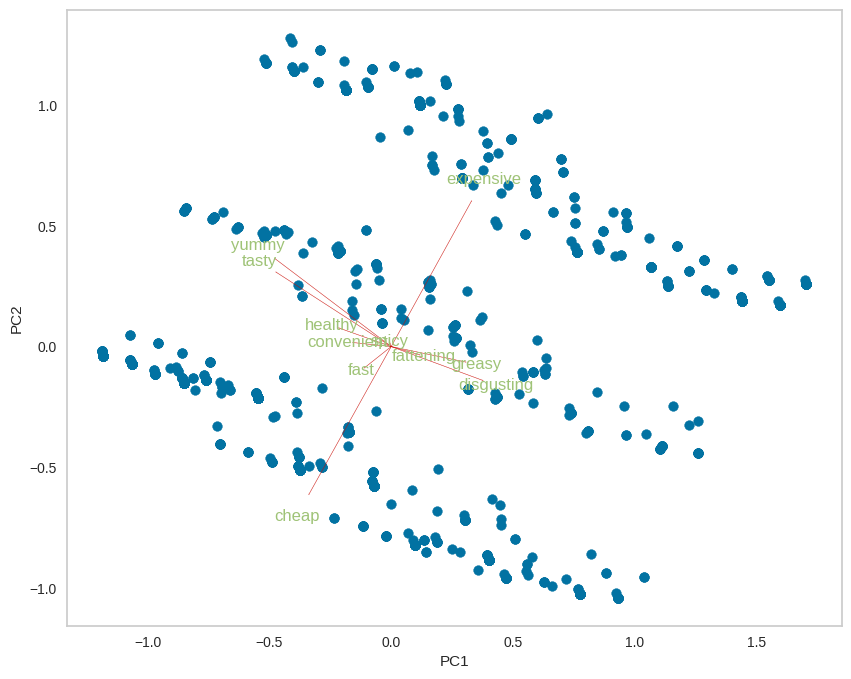

In [ ]:
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(score[:,0], score[:,1], color='b') # plot scores on PC1 and PC2
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
        if labels is not None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

pca.fit(x)
score = pca.transform(x)
coeff = pca.components_.T

# Call the biplot function
biplot(score, coeff, labels=data.columns)
plt.show()


In [ ]:
# Print the percentage of variance explained by each PC
for i, explained_var in enumerate(explained_variance_ratio):
    print(f"PC{i + 1}: {explained_var * 100:.2f}%")

PC1: 25.56%
PC2: 14.83%
PC3: 12.55%
PC4: 9.83%
PC5: 8.35%
PC6: 7.11%
PC7: 6.50%
PC8: 5.38%
PC9: 4.76%
PC10: 2.80%
PC11: 2.34%


### **4.  Extracting Segments:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

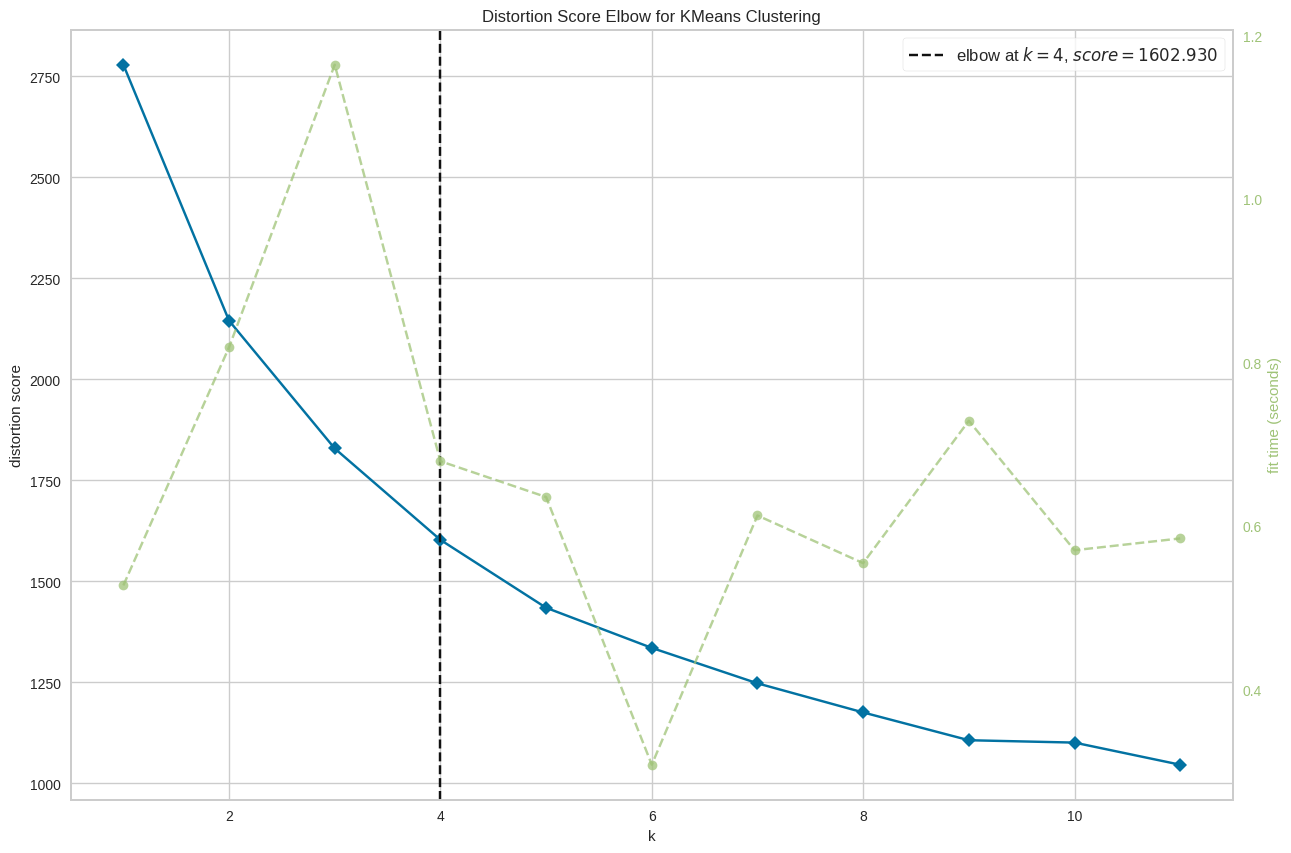

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
# Initialize a list to store the values of the within-cluster sum of squares (WCSS)
wcss = []

# Fit KMeans clustering for different values of k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)  # inertia_ returns the WCSS value for the model

from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,12)).fit(x)
visualizer.show()

In [ ]:
# Normalize the numerical variables---------------------PCA data ----------------------
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(pf)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4,n_init=10, random_state=42)
data['P_Segment'] = kmeans.fit_predict(segmentation_data_scaled)

print ("Inertia:",kmeans.inertia_)

print(Counter(kmeans.labels_))

# Predict cluster labels
labels = kmeans.labels_

# Evaluate clustering quality
silhouette_PCA = silhouette_score(pf, labels)
davies_bouldin_PCA= davies_bouldin_score(pf, labels)

print(f"Silhouette Score: {silhouette_PCA}")
print(f"Davies-Bouldin Index: {davies_bouldin_PCA}")

Inertia: 7786.609811185128
Counter({2: 462, 3: 461, 0: 337, 1: 193})
Silhouette Score: 0.21310566693039132
Davies-Bouldin Index: 1.8653284643430872


In [ ]:
# Normalize the numerical variables
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(x)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4,n_init=10, random_state=42)
data['X_Segment'] = kmeans.fit_predict(segmentation_data_scaled)

print ("Inertia:",kmeans.inertia_)

print(Counter(kmeans.labels_))

# Predict cluster labels
labels = kmeans.labels_

# Evaluate clustering quality
silhouette_x = silhouette_score(pf, labels)
davies_bouldin_x= davies_bouldin_score(pf, labels)

print(f"Silhouette Score: {silhouette_x}")
print(f"Davies-Bouldin Index: {davies_bouldin_x}")

Inertia: 10373.97122335569
Counter({2: 569, 0: 426, 1: 285, 3: 173})
Silhouette Score: 0.24945317849036314
Davies-Bouldin Index: 1.488720253734229


**Inertia:** It measures how tightly the clusters are packed around their centroids. Lower inertia indicates denser clusters.

**Cluster Sizes:** Ideally, we want clusters of approximately equal size, unless there's a specific reason for imbalanced sizes.

**Silhouette Score:** It measures how similar an object is to its own cluster compared to other clusters. Higher silhouette score indicates better-defined clusters.

**Davies-Bouldin Index:** It measures the average "similarity" between each cluster and its most similar cluster. Lower values indicate better separation between clusters.

**Preprocessed Data:**

Inertia: 10373.97

Silhouette Score: 0.249

Davies-Bouldin Index: 1.489

**PCA Data:**

Inertia: 7786.61

Silhouette Score: 0.213

Davies-Bouldin Index: 1.865

Based on these metrics:

1.  Preprocessed data has higher inertia, which indicates less dense clusters.
2.  Preprocessed data has a higher silhouette score, suggesting better-defined clusters.
3.  Preprocessed data has a lower Davies-Bouldin index, indicating better separation between clusters.

Considering these factors, preprocessed data appears to perform better in terms of silhouette score and Davies-Bouldin index.

In [ ]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'Age_Group', 'P_Segment', 'X_Segment'],
      dtype='object')

In [ ]:
data.drop(['P_Segment','X_Segment'],axis=1,inplace=True)

In [ ]:
# Normalize the numerical variables
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(pf)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Segment'] = kmeans.fit_predict(segmentation_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
x['Segment'] = kmeans.fit_predict(segmentation_data_scaled)

# Evaluate segments
segment_summary = x.groupby('Segment').mean()

# Display segment characteristics
print(segment_summary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            yummy  convenient     spicy  fattening    greasy      fast  \
Segment                                                                  
0        0.183976    0.741840  0.115727        1.0  0.830861  0.839763   
1        0.663212    0.880829  0.124352        0.0  0.119171  0.865285   
2        0.651515    0.965368  0.095238        1.0  1.000000  0.924242   
3        0.676790    0.982646  0.062907        1.0  0.000000  0.934924   

            cheap     tasty  expensive   healthy  disgusting  
Segment                                                       
0        0.495549  0.272997   0.528190  0.068249    1.000000  
1        0.632124  0.751295   0.248705  0.544041    0.082902  
2        0.612554  0.738095   0.348485  0.142857    0.000000  
3        0.646421  0.776573   0.288503  0.206074    0.000000  


In [ ]:
#To see each cluster size
Counter(kmeans.labels_)

Counter({3: 461, 2: 462, 0: 337, 1: 193})

In [ ]:
print (kmeans.inertia_)

7786.609811185135


In [ ]:
print(kmeans.n_iter_)

9


In [ ]:
print(kmeans.cluster_centers_)

[[ 1.18079888 -0.36147814 -0.25231601  0.56198005 -0.99616409 -0.3517059
  -0.07558238 -0.12922463]
 [-0.66222813  0.15586575  1.22423069  1.06288403  0.18639509  0.94925318
   0.84144589 -1.220838  ]
 [-0.03992267  0.07331546 -0.94473822 -0.15891819  0.85724067  0.26479785
  -0.02141811  0.06806059]
 [-0.54593258  0.12551909  0.61870506 -0.6965373  -0.20892006 -0.40567805
  -0.27555885  0.53736756]]


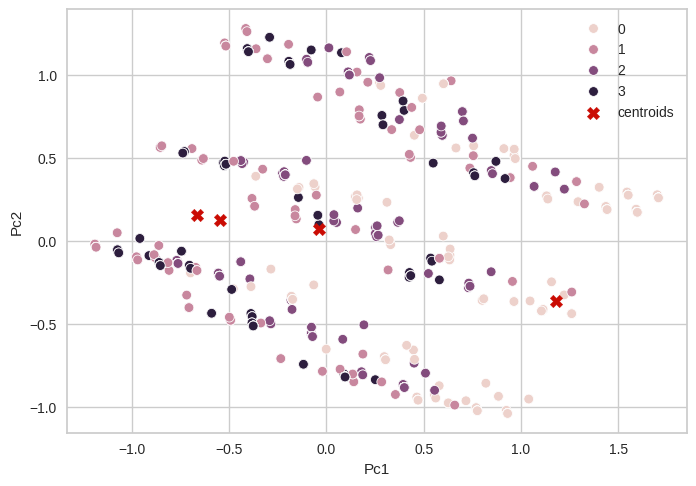

In [ ]:
sns.scatterplot(data=pf, x="Pc1", y="Pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

### **5. Segment Interpretation:**



In [ ]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender', 'Age_Group', 'Segment'],
      dtype='object')

In [ ]:
#like vs segment
crosstab =pd.crosstab(data['Segment'],data['Like'])
crosstab

Like,+1,+2,+3,+4,+5,-1,-2,-3,-4,-5,0
Segment,,,,,,,,,,,
0,20,13,13,6,8,15,26,34,45,122,35
1,15,22,35,35,39,5,4,9,2,11,16
2,58,78,76,54,47,24,22,18,13,12,60
3,59,74,105,65,49,14,7,12,11,7,58


In [ ]:
#gender vs segment
crosstab_g =pd.crosstab(data['Segment'],data['Gender'])
crosstab_g
#0- F
#1- M

Gender,Female,Male
Segment,,
0,165,172
1,90,103
2,268,194
3,265,196


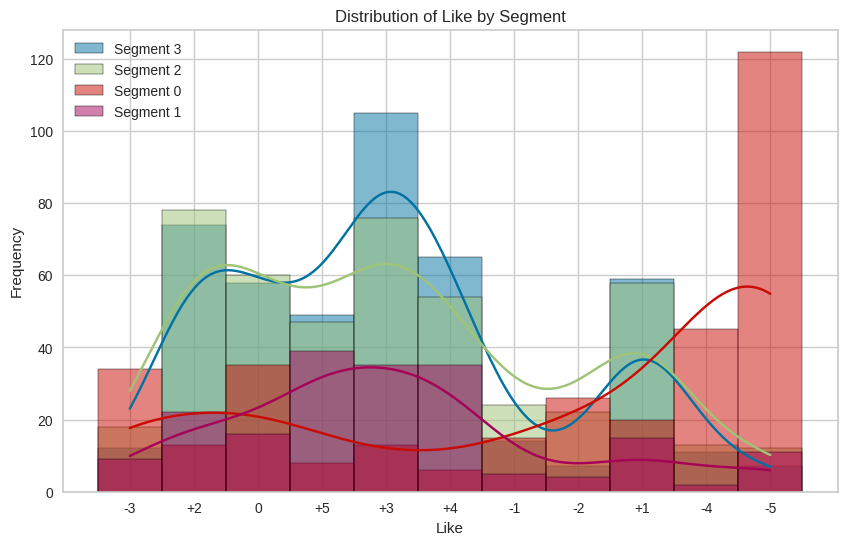

In [ ]:
# Histograms
plt.figure(figsize=(10, 6))
for segment in data['Segment'].unique():
    sns.histplot(data[data['Segment'] == segment]['Like'], label=f'Segment {segment}', alpha=0.5, kde=True)
plt.title('Distribution of Like by Segment')
plt.xlabel('Like')
plt.ylabel('Frequency')
plt.legend()
plt.show()

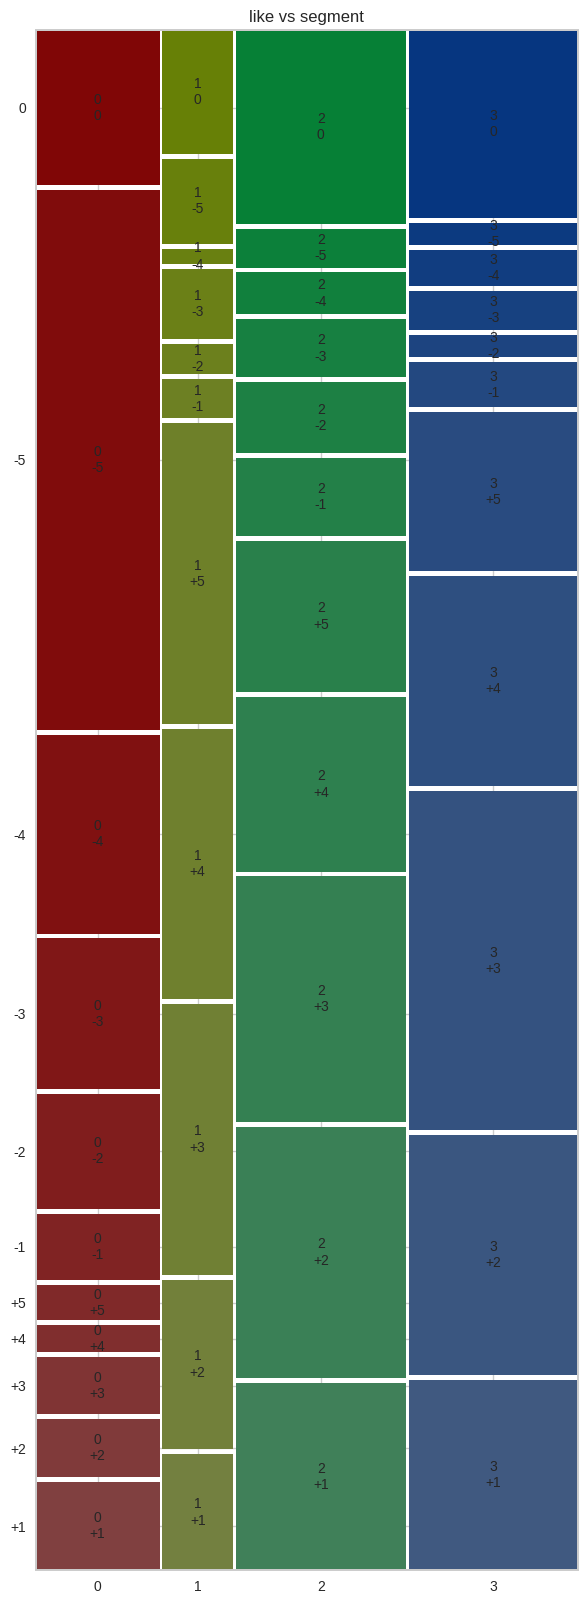

In [ ]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,20)
mosaic(crosstab.stack())
plt.title('like vs segment')
plt.show()

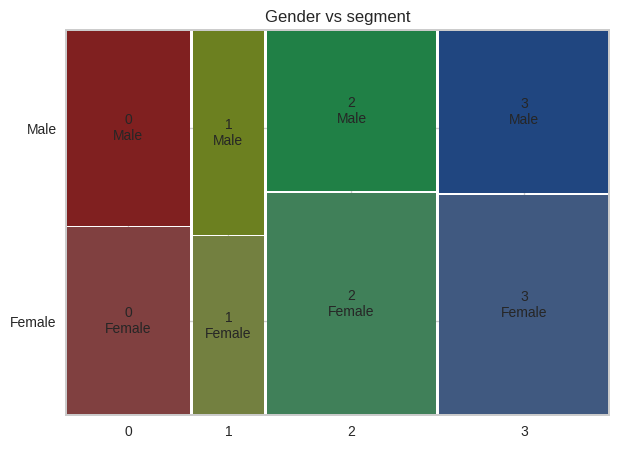

In [ ]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_g.stack())
plt.title('Gender vs segment')
plt.show()

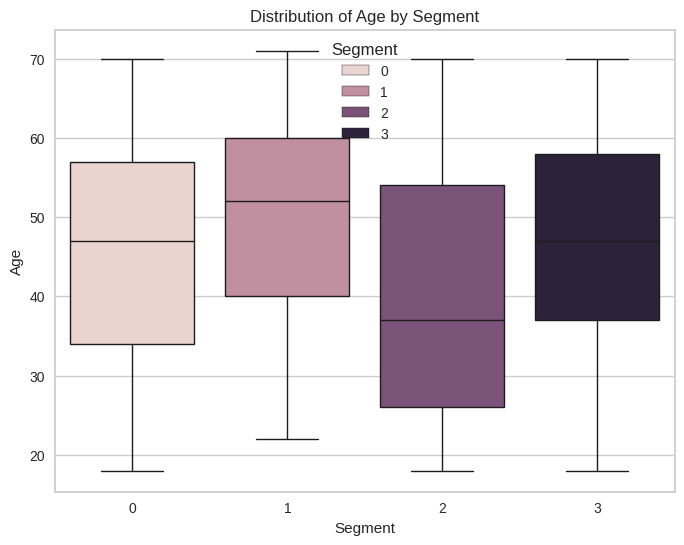

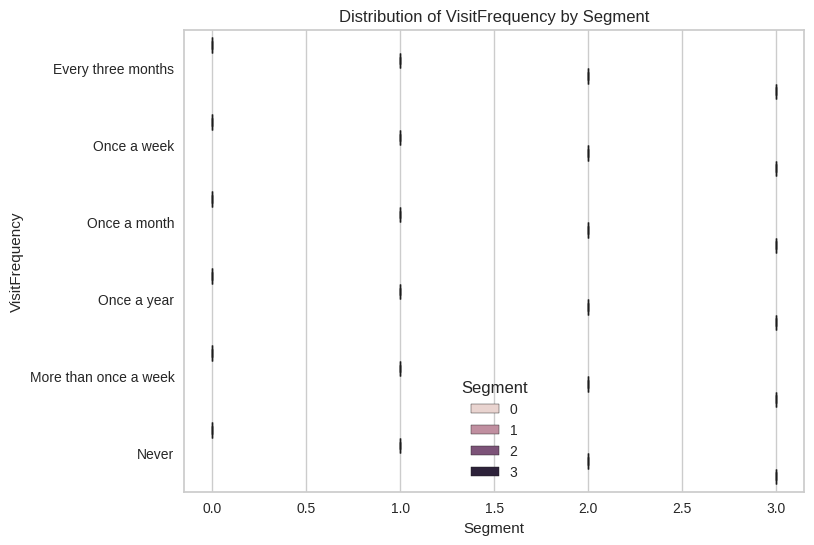

In [ ]:
# Plot segment-wise distributions for numeric variables
numeric_vars = ['Age', 'VisitFrequency']  # Example numeric variables
for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Segment', y=var, data=data,hue="Segment")
    plt.title(f'Distribution of {var} by Segment')
    plt.xlabel('Segment')
    plt.ylabel(var)
    plt.show()

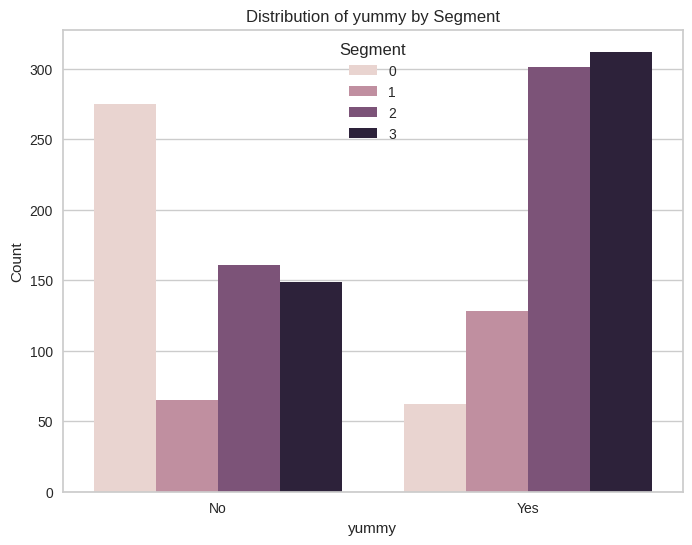

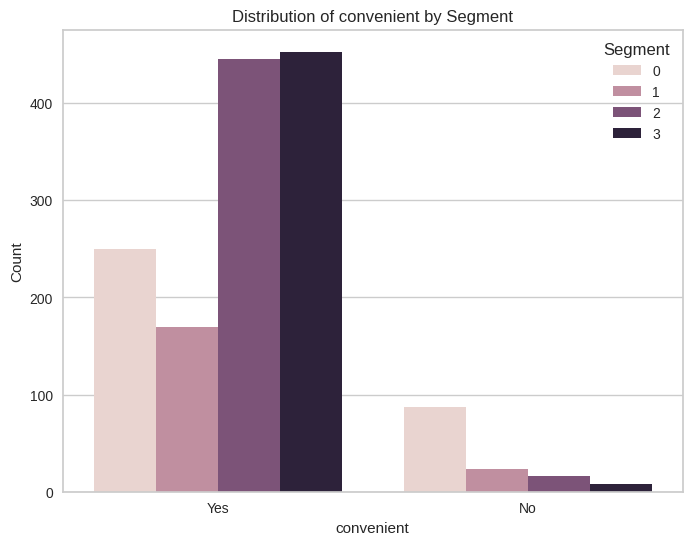

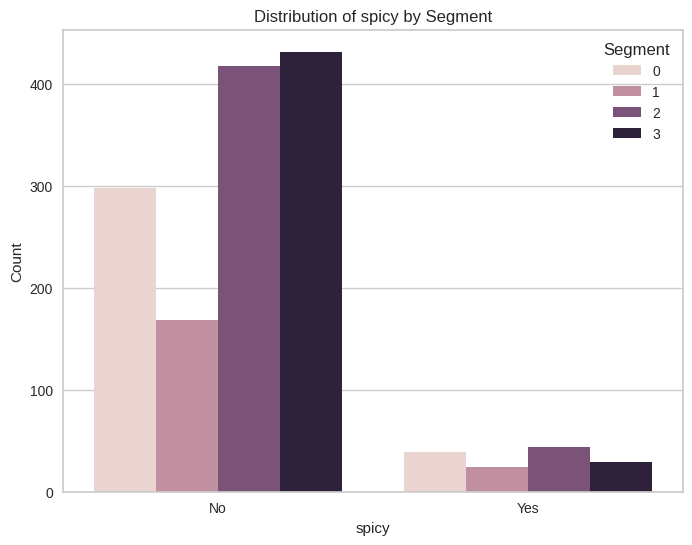

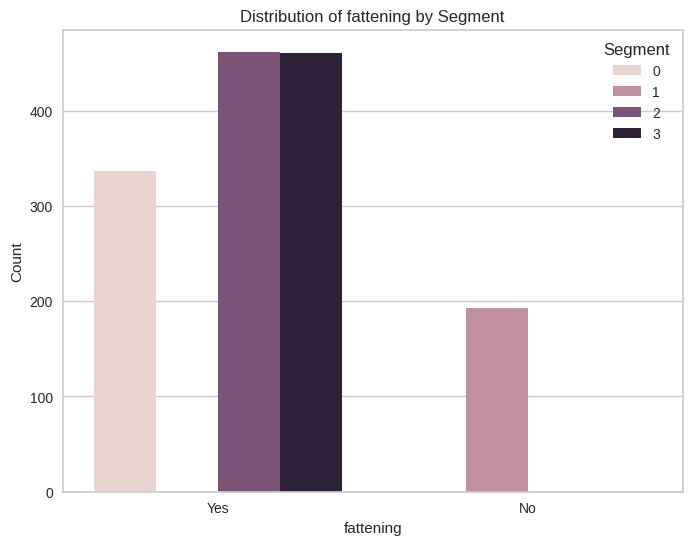

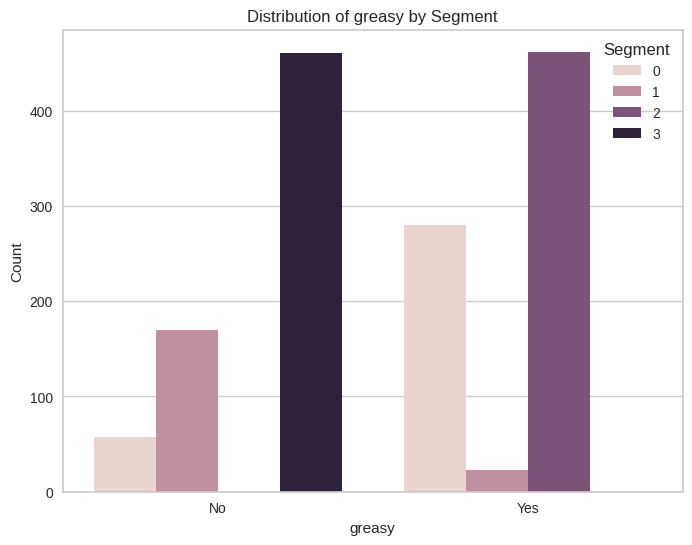

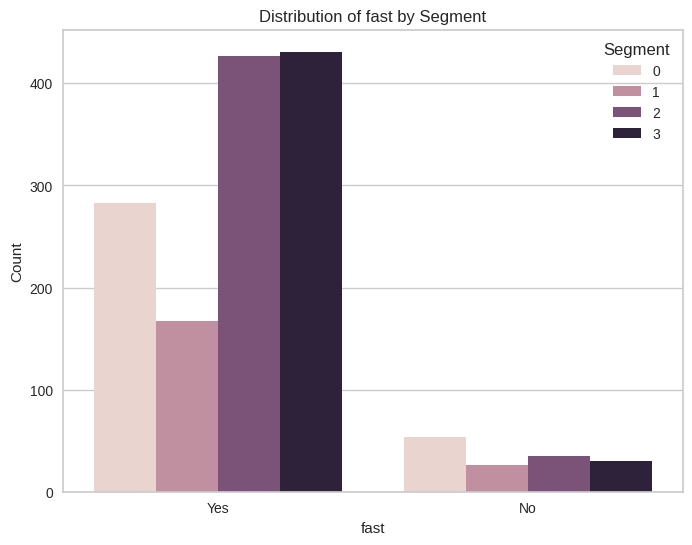

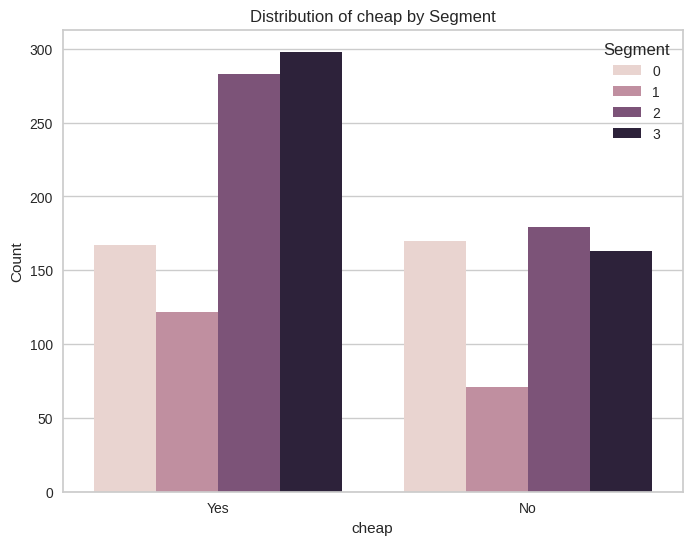

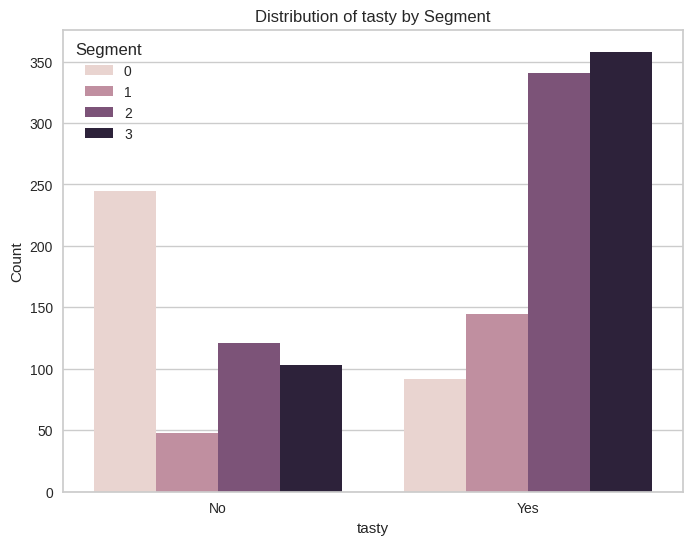

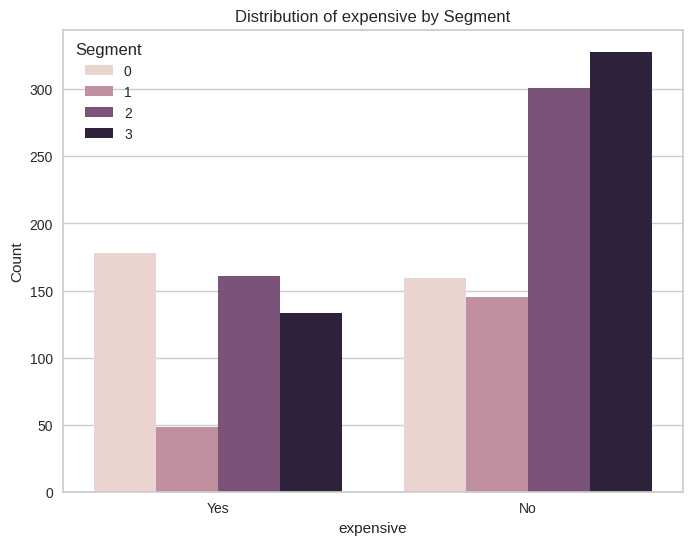

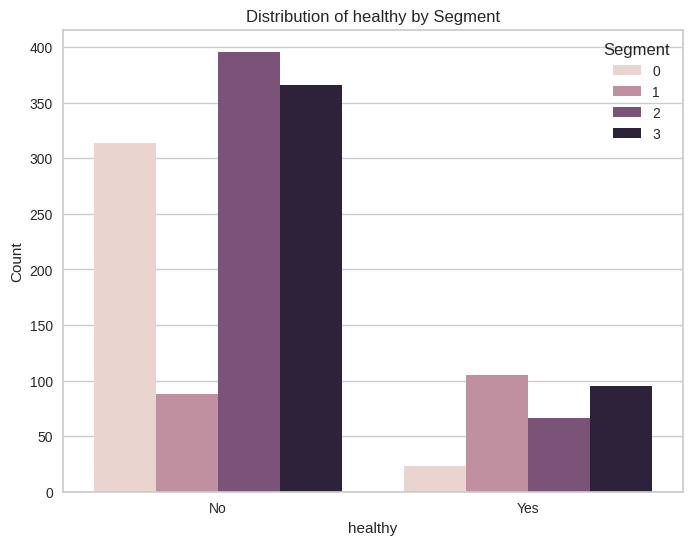

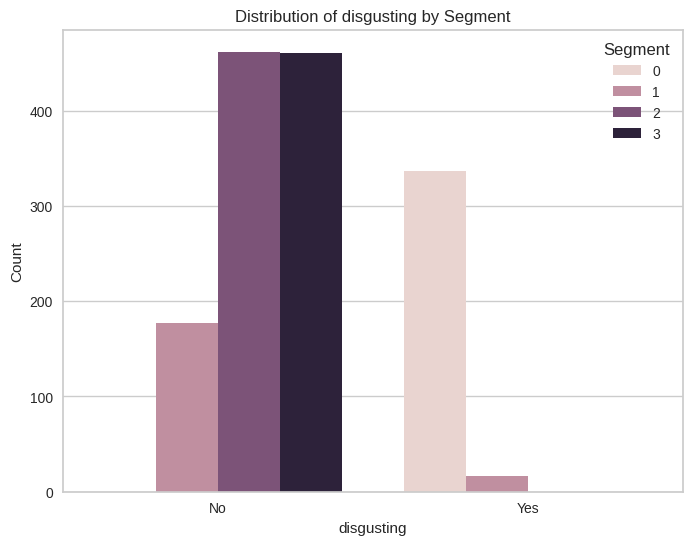

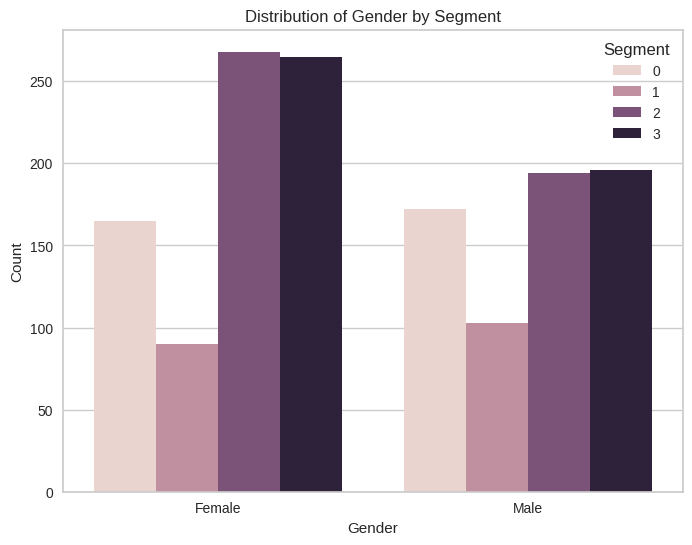

In [ ]:
# Plot segment-wise distributions for categorical variables
categorical_vars = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Gender']
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=var, hue='Segment', data=data)
    plt.title(f'Distribution of {var} by Segment')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Segment')
    plt.show()

In [ ]:
data['VisitFrequency'] = LabelEncoder().fit_transform(data['VisitFrequency'])
visit = data.groupby('Segment')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,Segment,VisitFrequency
0,0,2.626113
1,1,2.611399
2,2,2.683983
3,3,2.611714


In [ ]:
data['Like'] = LabelEncoder().fit_transform(data['Like'])
Like = data.groupby('Segment')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,Segment,Like
0,0,7.020772
1,1,3.834197
2,2,3.831169
3,3,3.475054


In [ ]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
Gender = data.groupby('Segment')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,Segment,Gender
0,0,0.510386
1,1,0.533679
2,2,0.419913
3,3,0.425163


In [ ]:
segment = Gender.merge(Like, on='Segment', how='left').merge(visit, on='Segment', how='left')
segment

,Segment,Gender,Like,VisitFrequency
0,0,0.510386,7.020772,2.626113
1,1,0.533679,3.834197,2.611399
2,2,0.419913,3.831169,2.683983
3,3,0.425163,3.475054,2.611714


**Segment 0:**

Gender: 51% male.

Like: high liking score of approximately 7.02 out of 10.

VisitFrequency: Average visit frequency of approximately 2.63 visits.

**Segment 1:**

Gender: 53% male.

Like: Average liking score of approximately 3.83 out of 10.

VisitFrequency: Average visit frequency of approximately 2.61 visits.

**Segment 2:**

Gender: 42% male.

Like: Average liking score of approximately 3.83 out of 10.

VisitFrequency: Average visit frequency of approximately 2.68 visits.

**Segment 3:**

Gender: 43% male.

Like: Average liking score of approximately 3.48 out of 10.

VisitFrequency: Average visit frequency of approximately 2.61 visits.

Based on these characteristics:

Segment 0 appears to be the segment with the highest average liking score and visit frequency, indicating that individuals in this segment have a strong liking for the product or service and tend to visit more frequently.

Segment 1 and Segment 2 have similar average liking scores but slightly different visit frequencies. Segment 1 has a slightly higher visit frequency compared to Segment 2.

Segment 3 has the lowest average liking score among all segments, suggesting that individuals in this segment might not be as interested in the product or service.

**Cluster 0: Health-Conscious Moderates**

Gender: Balanced representation.
Like: High level of liking
Visit Frequency: Moderate frequency.
Other Features: Moderate preference for convenient, greasy, and fast food. Moderate to low preference for spicy and expensive food. Relatively high disgust for unhealthy food. Moderate age distribution.
Interpretation: This cluster represents individuals who maintain a balanced approach to food choices, showing moderate preferences and behaviors across various dimensions. They prioritize convenience and health to some extent, with a balanced representation of genders.

**Cluster 1: Indulgent Food Enthusiasts**

Gender: Balanced representation.
Like:  Moderate level of liking..
Visit Frequency: Moderate frequency.
Other Features: Strong preference for convenient, greasy, and fast food. Low disgust for unhealthy food. Relatively younger age distribution.
Interpretation: This cluster consists of individuals who indulge in food choices, showing a strong preference for convenient and indulgent options. They have a high liking for food and visit food outlets moderately frequently, with a relatively younger age profile.

**Cluster 2: Health-Conscious Epicureans**

Gender: Slightly skewed towards males.
Like: Moderate to high level of liking.
Visit Frequency: High frequency.
Other Features: Moderate preference for convenient, greasy, and fast food. Moderate disgust for unhealthy food. Relatively high preference for tasty and expensive food. Balanced age distribution.
Interpretation: This cluster represents individuals who prioritize both health and taste in their food choices. They have a higher frequency of food outlet visits and a preference for tasty and expensive food items, with a balanced age distribution.

**Cluster 3: Convenience Seekers**

Gender: Slightly skewed towards females.
Like: Moderate to high level of liking.
Visit Frequency: Moderate frequency.
Other Features: Strong preference for convenient, greasy, and fast food. Relatively low disgust for unhealthy food. Balanced age distribution.
Interpretation: This cluster comprises individuals who prioritize convenience in their food choices. They have a strong preference for convenient and fast food options, with a moderate liking for food overall and a balanced age distribution.